<font color = green >

# Home task

</font>

## Titanic - Machine Learning from Disaster

Predict survival on the [Titanic](https://www.kaggle.com/c/titanic)

In [678]:
import numpy as np
import pandas as pd
import os 

In [679]:
cwd = os.getcwd()
path = os.path.join(cwd, 'data')

### Load train dataset

In [680]:
def get_train_set():
    print('Loading data...')
    
    fp = os. path.join(path, 'train.csv')
    df_train = pd.read_csv(fp,)
    df_train.set_index('PassengerId', inplace=True)
    return df_train
    
df_train = get_train_set()
df_train

Loading data...


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Load test dataset

In [681]:
def get_test_set():
    print('Loading data...')
    
    fp = os.path.join(path, 'test.csv')
    df_test = pd.read_csv(fp)
    df_test.set_index('PassengerId', inplace=True)
    return df_test

df_test = get_test_set()
df_test

Loading data...


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [682]:
df_train.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [683]:
df_test.isna().any()

Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare         True
Cabin        True
Embarked    False
dtype: bool

### Leaves relevant features

 - Pclass is an important feature because it shows the status and wealth of a person(but model thik is unimportant)

 - Name is an unimportant feature

 - Sex is an important feature because women often survive more often than men

 - Age is also an important feature, as children and old people have advantages

 - SibSP is a feature that can indicate marital status, which can help you survive

 - Parch this feature is similar to SibSP and reflects marital status

 - Ticket is not an important feature

 - Fare is an important feature

 - Cabin this feature is not important because most of the values are NaN, and the cabin number overlaps with the Pclass feature and so there may be duplicate values that will interfere with training

 - Embarked this feature can indicate social status, which can help you survive

In [684]:
def get_X_train_test(df_train, df_test):
    print('Getting X_train and X_test...')
    
    cols_needs=[
        'Sex',
        'Age',
        'SibSp',
        'Parch',
        'Fare',
        'Embarked',
    ]
    X_train = df_train[cols_needs]
    X_test = df_test[cols_needs]
    return X_train, X_test

X_train, X_test = get_X_train_test(df_train, df_test)

X_train, X_test

Getting X_train and X_test...


(                Sex   Age  SibSp  Parch     Fare Embarked
 PassengerId                                              
 1              male  22.0      1      0   7.2500        S
 2            female  38.0      1      0  71.2833        C
 3            female  26.0      0      0   7.9250        S
 4            female  35.0      1      0  53.1000        S
 5              male  35.0      0      0   8.0500        S
 ...             ...   ...    ...    ...      ...      ...
 887            male  27.0      0      0  13.0000        S
 888          female  19.0      0      0  30.0000        S
 889          female   NaN      1      2  23.4500        S
 890            male  26.0      0      0  30.0000        C
 891            male  32.0      0      0   7.7500        Q
 
 [891 rows x 6 columns],
                 Sex   Age  SibSp  Parch      Fare Embarked
 PassengerId                                               
 892            male  34.5      0      0    7.8292        Q
 893          female  47.0

### Encoder non-numeric features to numeric

In [685]:
from sklearn.preprocessing import LabelEncoder

def encode_columns(X_train, X_test):
    print('Encoding data...')
    
    columns_encode = [
    'Age',
    'Sex',
    'Embarked'
    ]
    X_train = X_train.copy()
    X_test = X_test.copy()
    
    
    for col in columns_encode:
        if col == 'Age':
            X_train[col] = X_train[col].astype(float)
            X_test[col] = X_test[col].astype(float)
            continue
        
        le_encorder = LabelEncoder().fit(X_train[col].astype(str))
        X_train[col] = le_encorder.transform(X_train[col].astype(str))
        X_test[col] = le_encorder.transform(X_test[col].astype(str))
    return X_train, X_test

X_train, X_test = encode_columns(X_train, X_test)
X_train, X_test

Encoding data...


(             Sex   Age  SibSp  Parch     Fare  Embarked
 PassengerId                                            
 1              1  22.0      1      0   7.2500         2
 2              0  38.0      1      0  71.2833         0
 3              0  26.0      0      0   7.9250         2
 4              0  35.0      1      0  53.1000         2
 5              1  35.0      0      0   8.0500         2
 ...          ...   ...    ...    ...      ...       ...
 887            1  27.0      0      0  13.0000         2
 888            0  19.0      0      0  30.0000         2
 889            0   NaN      1      2  23.4500         2
 890            1  26.0      0      0  30.0000         0
 891            1  32.0      0      0   7.7500         1
 
 [891 rows x 6 columns],
              Sex   Age  SibSp  Parch      Fare  Embarked
 PassengerId                                             
 892            1  34.5      0      0    7.8292         1
 893            0  47.0      1      0    7.0000         2


In [686]:
X_test.dtypes

Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

### Clean datasets from Nan values

In [687]:
def clean_blank_target(df):
    print('Cleaning data...')
    for col in list(df):
        if df[col].isna().any():
            non_empty = [item  for item in list (df[col]) if not np.isnan(item)]
            df[col] = df[col].apply(lambda x: np.random.choice(non_empty) if np.isnan(x) else x)
    return df


X_train = clean_blank_target(X_train)
X_test = clean_blank_target(X_test)
X_train, X_test

Cleaning data...
Cleaning data...


(             Sex   Age  SibSp  Parch     Fare  Embarked
 PassengerId                                            
 1              1  22.0      1      0   7.2500         2
 2              0  38.0      1      0  71.2833         0
 3              0  26.0      0      0   7.9250         2
 4              0  35.0      1      0  53.1000         2
 5              1  35.0      0      0   8.0500         2
 ...          ...   ...    ...    ...      ...       ...
 887            1  27.0      0      0  13.0000         2
 888            0  19.0      0      0  30.0000         2
 889            0  32.0      1      2  23.4500         2
 890            1  26.0      0      0  30.0000         0
 891            1  32.0      0      0   7.7500         1
 
 [891 rows x 6 columns],
              Sex   Age  SibSp  Parch      Fare  Embarked
 PassengerId                                             
 892            1  34.5      0      0    7.8292         1
 893            0  47.0      1      0    7.0000         2


In [688]:
X_train.isna().any()

Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [689]:
X_test.isna().any()

Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

### Load gender_submission dataset

In [690]:
def get_gender_submission_set():
    print('Loading data...')
    
    fp = os.path.join(path, 'gender_submission.csv')
    df_gender_submission = pd.read_csv(fp, low_memory=False)
    return df_gender_submission

df_gender_submission = get_gender_submission_set()
df_gender_submission.head()

Loading data...


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [691]:
df_gender_submission.isna().any()

PassengerId    False
Survived       False
dtype: bool

### Normalize features

In [692]:
from sklearn.preprocessing import MinMaxScaler

def normalize(X_train, X_test):
    print('Normalizing data...')
    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = normalize(X_train, X_test)
X_train_scaled, X_test_scaled

Normalizing data...


(array([[1.        , 0.27117366, 0.125     , 0.        , 0.01415106,
         0.66666667],
        [0.        , 0.4722292 , 0.125     , 0.        , 0.13913574,
         0.        ],
        [0.        , 0.32143755, 0.        , 0.        , 0.01546857,
         0.66666667],
        ...,
        [0.        , 0.39683338, 0.125     , 0.33333333, 0.04577135,
         0.66666667],
        [1.        , 0.32143755, 0.        , 0.        , 0.0585561 ,
         0.        ],
        [1.        , 0.39683338, 0.        , 0.        , 0.01512699,
         0.33333333]]),
 array([[1.        , 0.4282483 , 0.        , 0.        , 0.01528158,
         0.33333333],
        [0.        , 0.58532295, 0.125     , 0.        , 0.01366309,
         0.66666667],
        [1.        , 0.77381252, 0.        , 0.        , 0.01890874,
         0.33333333],
        ...,
        [1.        , 0.47851219, 0.        , 0.        , 0.01415106,
         0.66666667],
        [1.        , 0.39683338, 0.        , 0.        , 0.015

### Execute all preprocessing

In [693]:
def apply_preprocessing(df_train, df_test):
    df_gender_submission = get_gender_submission_set()

    y_train = df_train['Survived']
    y_test = df_gender_submission['Survived']

    X_train, X_test = get_X_train_test(df_train, df_test)

    X_train, X_test = encode_columns(X_train, X_test)

    X_train = clean_blank_target(X_train)
    X_test = clean_blank_target(X_test)
    
    X_train_scaled, X_test_scaled = normalize(X_train, X_test)
         
    return X_train_scaled, X_test_scaled, y_train, y_test

## Running on provided Train and Test sets

### Load provided train and test sets

In [694]:
df_train = get_train_set()
df_test = get_test_set()

X_train_scaled, X_test_scaled, y_train, y_test = apply_preprocessing(df_train, df_test)

print ('X_train_scaled shape= {}\nX_test_scaled shape= {}'.format(X_train_scaled.shape, X_test_scaled.shape))
print ('y_train set shape= {}'.format(y_train.shape))
print ('y_test type = {}'.format(type(y_test)))

Loading data...
Loading data...
Loading data...
Getting X_train and X_test...
Encoding data...
Cleaning data...
Cleaning data...
Normalizing data...
X_train_scaled shape= (891, 6)
X_test_scaled shape= (418, 6)
y_train set shape= (891,)
y_test type = <class 'pandas.core.series.Series'>


### Train model

In [695]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [696]:
clf = MLPClassifier(hidden_layer_sizes=[100], max_iter=10000, random_state=0)
grid_values = {'alpha' : [0.001, 0.01, 0.1, 1, 10]}

print ('Running GridSearchCV.')
grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='f1')
grid_clf.fit(X_train_scaled, y_train)
print('Grid best parameter (max f1 ): ', grid_clf.best_params_) 
print('Grid best score (f1): ', grid_clf.best_score_) 
test_score= grid_clf.score(X_test_scaled, y_test)
print("test f1= {}".format(test_score))


Running GridSearchCV.


Grid best parameter (max f1 ):  {'alpha': 0.01}
Grid best score (f1):  0.7494091757912564
test f1= 0.9299363057324841


### Predict the test set

In [697]:
from sklearn.model_selection import cross_val_score

In [698]:
clf = MLPClassifier(hidden_layer_sizes=[100], max_iter=10000, random_state=0, alpha=0.001)

f1_train = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='f1')
print('f1_train = {}'.format(f1_train))

clf.fit(X_train_scaled, y_train)
y_predict = clf.predict(X_test_scaled)

f1_train = [0.76811594 0.75555556 0.72180451 0.69491525 0.8030303 ]


### Features importance

In [699]:
import matplotlib.pyplot as plt

In [700]:
def plot_feature_importances(clf, features):
    weights = clf.coefs_[0]
    features_weights = np.sum(weights, axis=1)
    features_weights_dict = dict(zip(features, features_weights))
    
    plt.figure(figsize=(10, 6))
    plt.bar(features, features_weights, color='blue')
    plt.xlabel('Features')
    plt.ylabel('Weights')
    plt.title('Feature Weights in MLPClassifier')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


In [705]:
clf = MLPClassifier(hidden_layer_sizes=[100], max_iter=10000, random_state=0, alpha=0.001).fit(X_train_scaled, y_train)
y_predict = clf.predict(X_test_scaled)

MLP accuracy= 94.976%


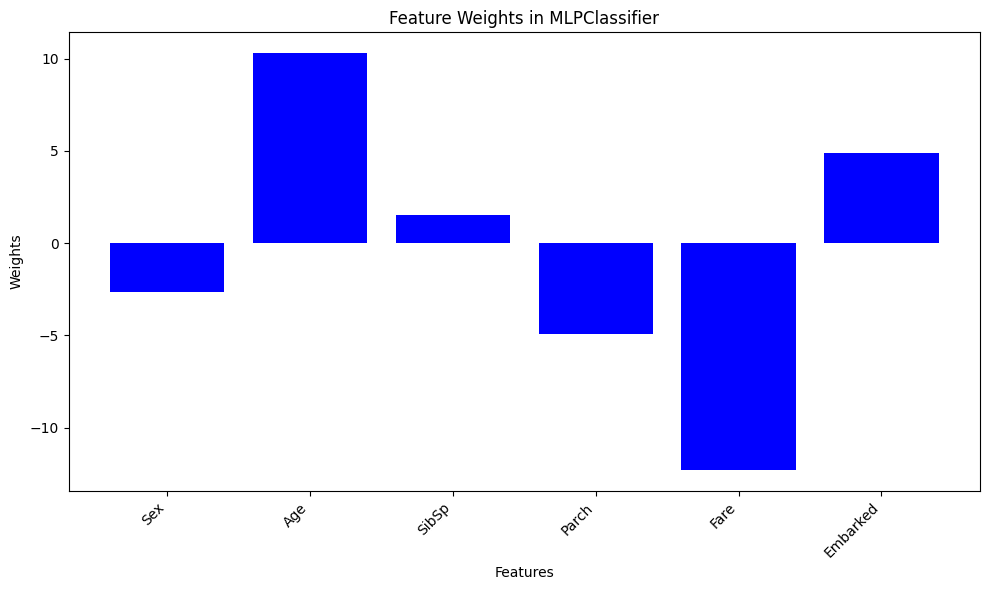

In [706]:
print("MLP accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

features = [
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked'
]

plot_feature_importances(clf, features)

In [707]:
df_gender_submission = get_gender_submission_set()

df_predict = df_gender_submission.copy()

df_predict['Survived'] = y_predict

correlation = df_gender_submission['Survived'].corr(df_predict['Survived'])

percentage_similarity = abs(correlation) * 100
percentage_similarity

Loading data...


89.37510328289837

In [708]:
df_predict.to_csv('D:\My Projects(II kyrc)(1 semester)\Py projects\Projects Data Science Camp\Work Lesson 12(supervised ml cover)\Lesson_supervised_ml_cover_Task\df_predict.csv',index= False)